In [124]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [125]:
data = pd.read_csv('bank-full.csv', delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [126]:
print(data.duplicated().sum())
data.shape

0


(45211, 17)

In [127]:
data['y'].value_counts(dropna=True)

y
no     39922
yes     5289
Name: count, dtype: int64

In [128]:
data['y'] = data['y'].replace({'no': '0', 'yes': '1'})


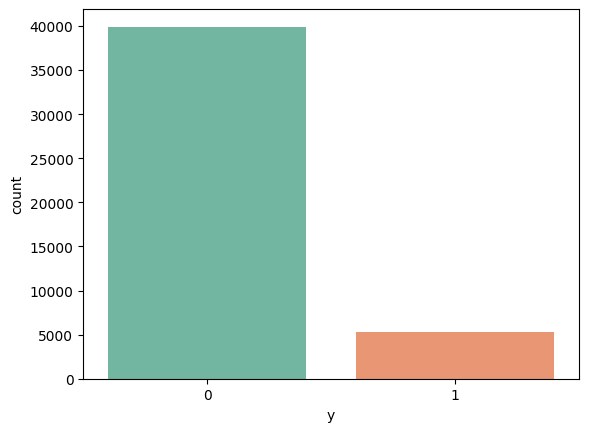

In [129]:
sns.countplot(x='y', data=data, palette='Set2', hue='y', legend=False)
plt.show()

In [130]:
data.dtypes[data.dtypes == 'object'].index

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [131]:
data['job'].value_counts(dropna=True)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [48]:
data['job'].unique()

array(['White-collar', 'technician', 'Self-depend', 'blue-collar',
       'Others', 'Pink-collar'], dtype=object)

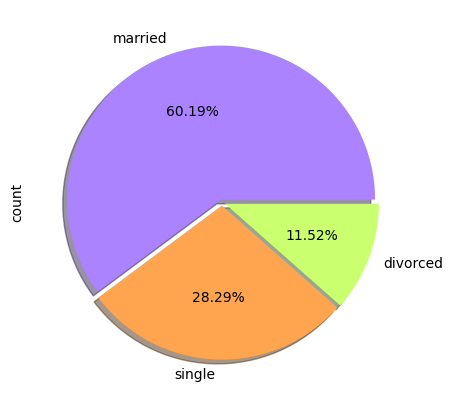

In [50]:

marital_counts = data['marital'].value_counts(dropna=True)


explode = [0.02] * len(marital_counts)  # Adjust the length to match the categories

marital_counts.plot(kind='pie', autopct='%0.2f%%', figsize=[5, 5], 
                    explode=explode, colors=['#AB82FF', '#FFA54F', '#CAFF70', '#CDCD00'], 
                    shadow=True)
plt.show()


In [51]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

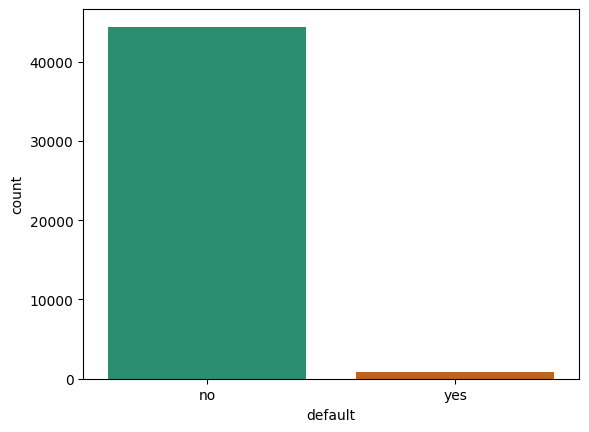

In [53]:
sns.countplot(x='default', data=data, hue='default', palette='Dark2', legend=False)

plt.show()

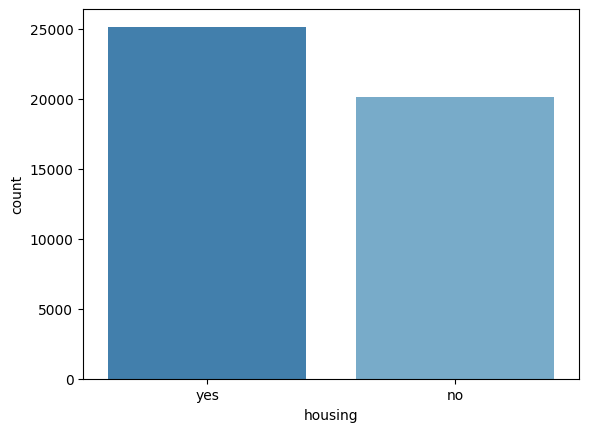

In [56]:
sns.countplot(x='housing', data=data, hue='housing', palette='tab20c', legend=False)
plt.show()

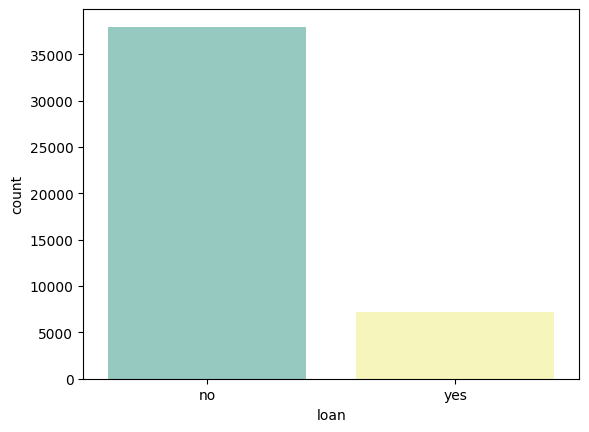

In [57]:
sns.countplot(x = data['loan'], data = data, hue = 'loan', palette = 'Set3')
plt.show()

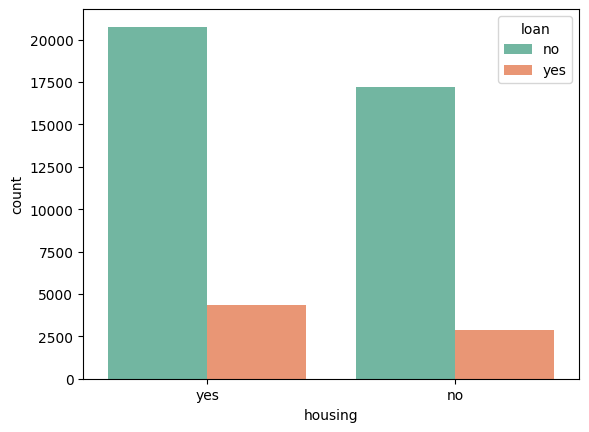

In [59]:
sns.countplot(x = data['housing'], data = data, hue = 'loan', palette = 'Set2')
plt.show()

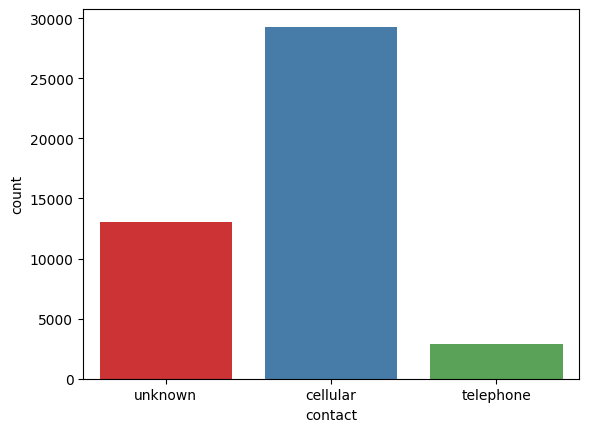

In [60]:
sns.countplot(x = data['contact'], data = data, hue = 'contact', palette = 'Set1')
plt.show()

In [61]:
ContactPoutcome = pd.crosstab(data.contact, data.poutcome, rownames=['contact'], colnames=['poutcome'])
ContactPoutcome

poutcome,failure,other,success,unknown
contact,,,,
cellular,4529,1637,1385,21734
telephone,341,176,114,2275
unknown,31,27,12,12950


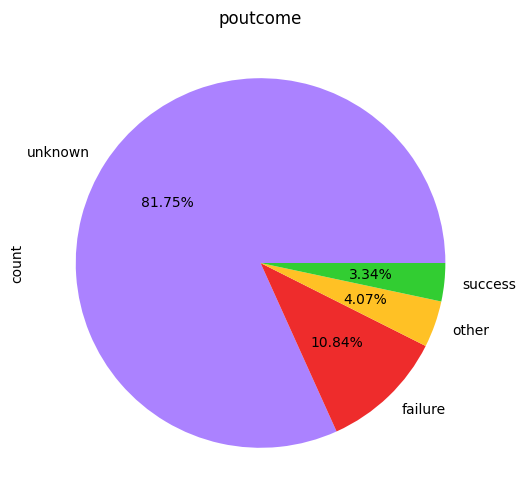

In [67]:
data['poutcome'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [6,6],
                                    colors = ['#AB82FF', '#EE2C2C', '#FFC125', '#32CD32'])
plt.title('poutcome')
plt.show()

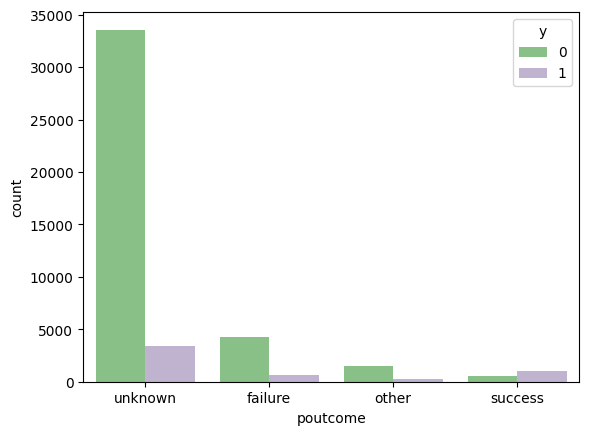

In [68]:
sns.countplot(x = data['poutcome'], data = data, hue = 'y', palette = 'Accent')
plt.show()

In [62]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(ContactPoutcome)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject Ho)')
else:
    print('Independent (Ho holds true)')




p value is 0.0
Dependent (reject Ho)


In [63]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [64]:
data['month'] = data['month'].replace(['jan', 'feb', 'mar'], 'Quarter1')

data['month'] = data['month'].replace(['apr', 'may', 'jun'], 'Quarter2')

data['month'] = data['month'].replace(['jul', 'aug', 'sep'], 'Quarter3')

data['month'] = data['month'].replace(['oct', 'nov', 'dec'], 'Quarter4')

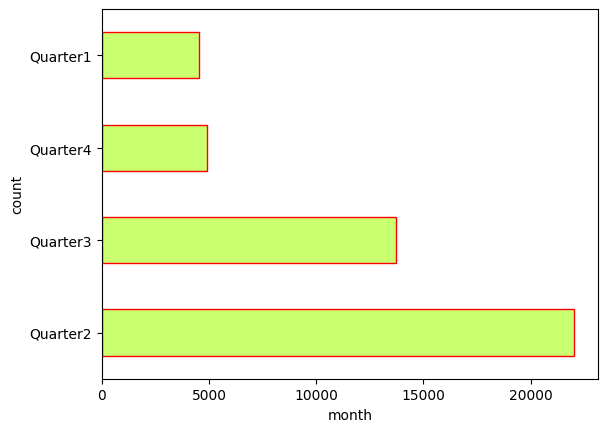

In [65]:
data['month'].value_counts().plot(kind = 'barh', color = '#CAFF70', edgecolor = 'r')
plt.xlabel('month')
plt.ylabel('count')
plt.show()

In [70]:
data['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

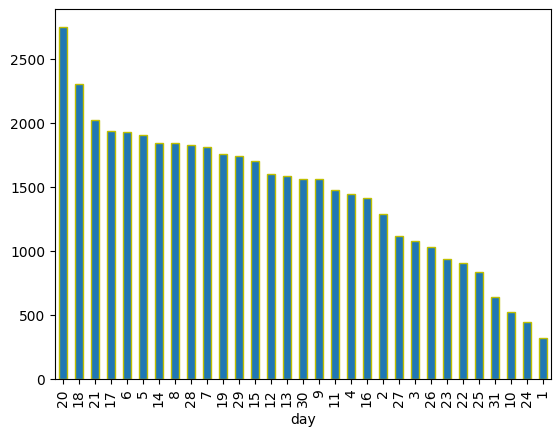

In [71]:
data['day'].value_counts().plot(kind = 'bar', edgecolor = 'y')
plt.show()

## Numerical Predictors

In [73]:
data.dtypes[data.dtypes != 'object'].index

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

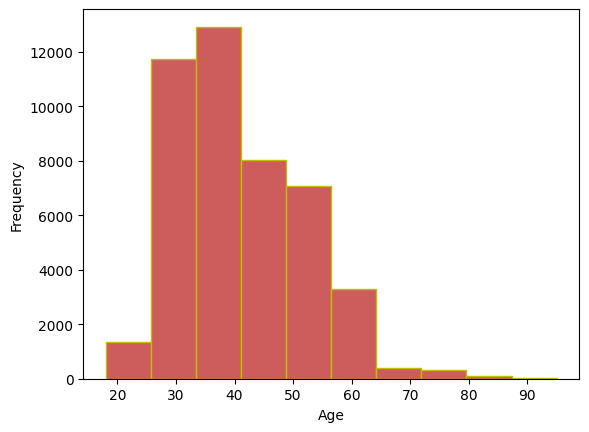

In [74]:
data['age'].plot(kind = 'hist', y = 'Frequency', color = '#CD5C5C', edgecolor = 'y' )
plt.xlabel('Age')
plt.show()

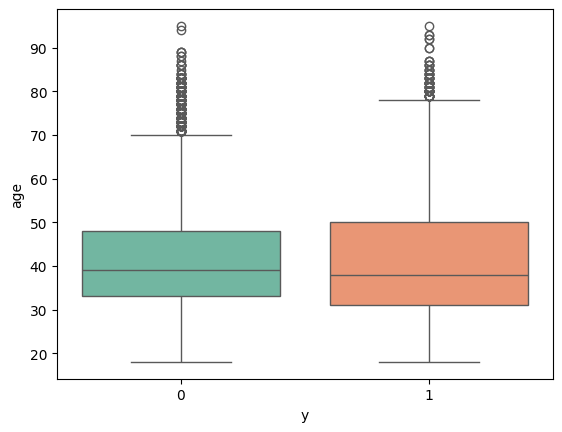

In [81]:
sns.boxplot(x='y', y='age', hue='y', data=data, palette='Set2')
plt.show()


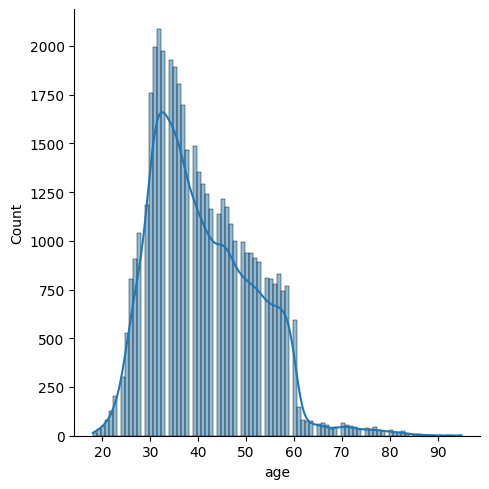

In [90]:
sns.displot(data['age'], kde=True)
plt.show()

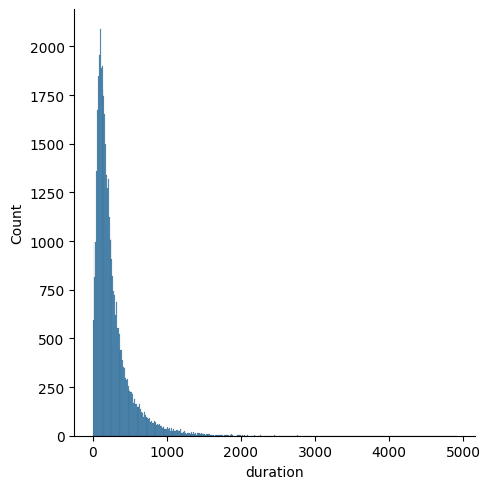

In [92]:
sns.displot(data['duration'])
plt.show()

In [94]:
data['duration'].max()/60/60

np.float64(1.366111111111111)

In [96]:
data['duration'].var()

np.float64(66320.57409008562)

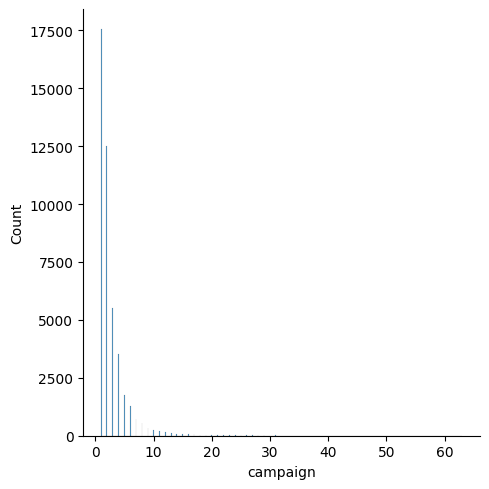

In [98]:
sns.displot(data['campaign'])
plt.show()

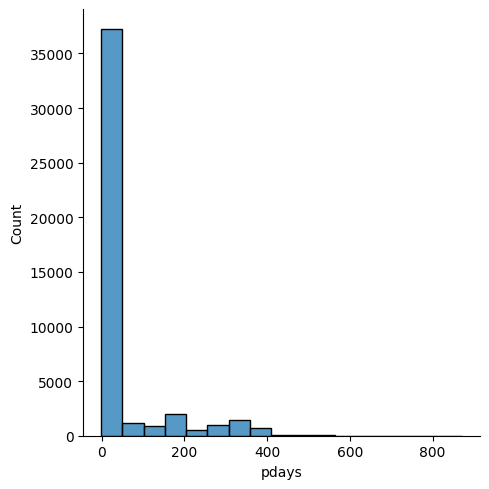

In [99]:
sns.displot(data['pdays'])
plt.show()

## Checking Correlation

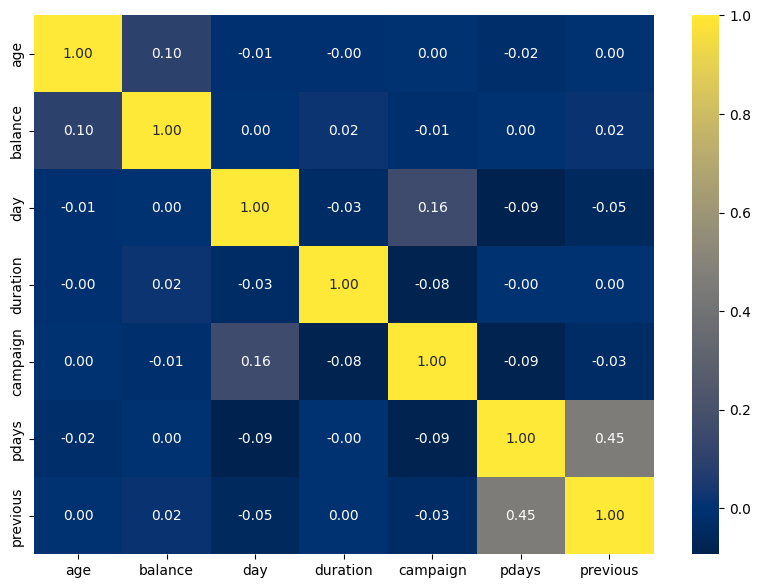

In [112]:
numeric_data = data.select_dtypes(include=[np.number])

corr = numeric_data.corr()

plt.figure(figsize=[10, 7])
sns.heatmap(corr, annot=True, cmap='cividis', fmt='0.2f')
plt.show()

In [113]:
def missingValues(data):
    m=data.isnull().sum()
    md=(data.isnull().sum()/ data.shape[0]*100)
    df=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    fg=df.sort_values(by ="Percentage", ascending=False)
    fg1=fg[fg["Percentage"]>0]
    return fg1

missingValues(data)

,Missing,Percentage


## Checking Outliers

In [114]:
data.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
age,45211.0,40.936210,10.618762,18.0,23.0,25.0,26.0,26.0,27.0,29.0,33.0,39.0,48.0,56.0,59.0,59.0,60.0,63.0,71.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,-627.0,-435.0,-322.0,-242.0,-172.0,0.0,72.0,448.0,1428.0,3574.0,5768.0,6572.6,7777.9,9439.4,13164.9,102127.0
day,45211.0,15.806419,8.322476,1.0,2.0,2.0,2.0,3.0,3.0,5.0,8.0,16.0,21.0,28.0,29.0,30.0,30.0,30.0,31.0,31.0
duration,45211.0,258.163080,257.527812,0.0,11.0,16.0,22.0,27.0,35.0,58.0,103.0,180.0,319.0,548.0,751.0,823.0,914.7,1051.0,1269.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,5.0,8.0,8.0,10.0,12.0,16.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,185.0,317.0,337.0,349.0,360.0,370.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,5.0,6.0,8.9,275.0


## Outliers Treatment

In [134]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile
             (.01))
    return x 

In [135]:
numerical_var = data.dtypes[data.dtypes != "object"].index
data_num = data[numerical_var]

In [136]:
data_num1 = data_num.apply(lambda x : outliers(x))

In [137]:
categorical_var = data.dtypes[data.dtypes == "object"].index
data_cat = data[categorical_var]

In [138]:
bank1 = pd.concat([data_cat, data_num1], axis = 1)

## Creating Dummies

In [139]:
bank1.shape

(45211, 17)

In [140]:
cleaned_bank = pd.get_dummies(bank1, drop_first=True)

In [141]:
cleaned_bank.shape

(45211, 43)

In [142]:
cleaned_bank.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_1'],
      dtype='object')

In [143]:
data['y'].value_counts(normalize=True)

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

In [144]:
x = cleaned_bank.drop(columns = ['y_1'])
y = cleaned_bank['y_1']

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Feature Scaling

In [146]:
sc = StandardScaler()
sc_fit = sc.fit(x_train)

x_train_sc = sc_fit.transform(x_train)
x_test_sc = sc_fit.transform(x_test)

In [147]:
x_train_sc_df = pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc_df = pd.DataFrame(x_test_sc, columns=x_test.columns)

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x_train_sc_df.columns
vif_data['VIF'] = [variance_inflation_factor(x_train_sc_df.values, i) for i in range(len(x_train_sc_df.columns))]

In [150]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
41,poutcome_unknown,8.276435
5,pdays,5.553055
35,month_may,4.849058
33,month_jun,3.521036
21,education_tertiary,3.406308
28,month_aug,3.176634
32,month_jul,3.135764
10,job_management,3.072003
19,marital_single,2.892550
20,education_secondary,2.619663


## Imbalanced Data Treatment with RandomUnderSampler

In [151]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(replacement=False, sampling_strategy=.6)

x_under, y_under = undersample.fit_resample(x_train_sc_df, y_train)

In [152]:
from collections import Counter

print('Before sampling class distribution:-',Counter(y_train))

print('New class distribution:-',Counter(y_under))

Before sampling class distribution:- Counter({False: 31942, True: 4226})
New class distribution:- Counter({False: 7043, True: 4226})


In [153]:
def new_ratio(y):
    zero=len(y)-y.sum()
    one=y.sum()
    rro=round(((one/len(y))*100),2)
    rrz=round(((zero/len(y))*100),2)
    print(f"Class ratio 1 ({one}) :0 ({zero}) is {rro}% : {rrz}%")

In [154]:
new_ratio(y_under)

Class ratio 1 (4226) :0 (7043) is 37.5% : 62.5%


## Support Vector Macine

In [159]:
from sklearn.model_selection import RandomizedSearchCV

params1 = {"kernel":['linear', 'poly', 'rbf'],
       "degree":[1,2,3],
       "gamma":[0.1,1,.001],
       "C":[0.1,1,10]}

sv1 = svm.SVC()
svm_class1 = RandomizedSearchCV(sv1, params1, cv=3, n_jobs=-1, verbose=True)
svm_class1.fit(x_under, y_under)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'degree': [1, 2, 3],
                                        'gamma': [0.1, 1, 0.001],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=True)

In [156]:
print("Best roc auc score : ", svm_class1.best_score_)
print(svm_class1.best_estimator_)

Best roc auc score :  0.8383176395187627
SVC(C=1, gamma=0.001, kernel='linear')


In [157]:
import time

st = time.time()

sv3 = svm.SVC(kernel="rbf", degree=2, gamma=0.01, C=10, probability=True)

sv3.fit(x_under, y_under)

print("Train score :", sv3.score(x_under, y_under))
print("Test score :", sv3.score(x_test_sc_df, y_test))

et = time.time()
print("Time Taken", et-st, "sec")

Train score : 0.9039843819327358
Test score : 0.8571270596041137
Time Taken 45.16648721694946 sec


## Model Evaluation

In [160]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(metrics.f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {metrics.classification_report(y_test, y_pred)}")

In [161]:
y_train_pred1 = sv3.predict(x_under)
display_scores(y_under, y_train_pred1)

F1 Score: 87.3%
Classification Report: 
               precision    recall  f1-score   support

       False       0.93      0.92      0.92      7043
        True       0.87      0.88      0.87      4226

    accuracy                           0.90     11269
   macro avg       0.90      0.90      0.90     11269
weighted avg       0.90      0.90      0.90     11269



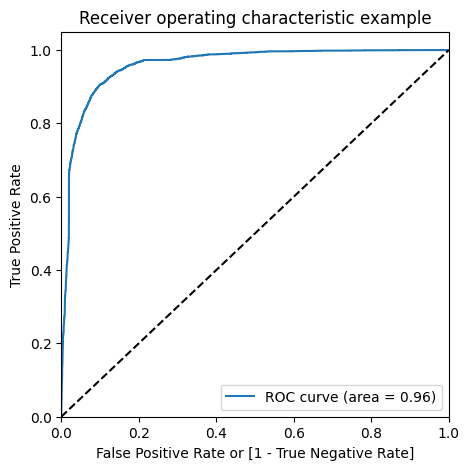

In [162]:
y_train_pred_proba1 = sv3.predict_proba(x_under)[:,1]

draw_roc(y_under, y_train_pred_proba1)

In [163]:
y_test_pred1 = sv3.predict(x_test_sc_df)
display_scores(y_test, y_test_pred1)

F1 Score: 57.56%
Classification Report: 
               precision    recall  f1-score   support

       False       0.97      0.86      0.91      7980
        True       0.44      0.82      0.58      1063

    accuracy                           0.86      9043
   macro avg       0.71      0.84      0.74      9043
weighted avg       0.91      0.86      0.87      9043



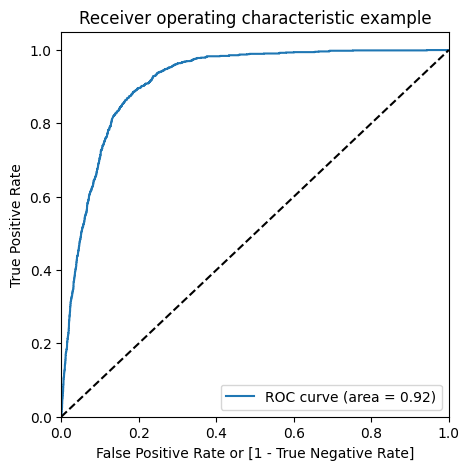

In [164]:
y_test_pred_proba1 = sv3.predict_proba(x_test_sc_df)[:,1]

draw_roc(y_test, y_test_pred_proba1)

In [168]:
import pandas as pd

model_report = pd.DataFrame(columns=['Model', 'ROC Score', 'Precision Score', 'Recall Score', 'F1 Score', 'Accuracy Score'])

tmp2 = pd.Series({'Model': "Support Vector Machine",
                  'ROC Score': metrics.roc_auc_score(y_test, y_test_pred1),
                  'Precision Score': metrics.precision_score(y_test, y_test_pred1),
                  'Recall Score': metrics.recall_score(y_test, y_test_pred1),
                  'F1 Score': metrics.f1_score(y_test, y_test_pred1),
                  'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred1)})

model_svm_imb_report = pd.concat([model_report, tmp2.to_frame().T], ignore_index=True)
model_svm_imb_report


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Support Vector Machine,0.842806,0.442201,0.824083,0.575558,0.857127
